In [23]:
# Import pandas library
# Python을 이용하여 통계 또는 계량 분석을 하기 위해 필요한 명령어 모음들을 불러오기
# 앞으로 Python을 이용한 데이터 분석을 할 때는 아래의 불러오기를 반드시 제일 먼저 실행시켜야 함을 명심할 것
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
#import pandas_datareader as pdr 실행안되는데?
from datetime import date
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.datasets import make_regression
from pandas.util.testing import assert_frame_equal



In [24]:
import os
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

In [25]:
#import pandas_datareader as pdr


In [26]:
wage1 = pd.read_excel('data/wage1.xls')
wage1

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [11]:
wage2 = pd.read_excel('data/wage1.xls')
wage2

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [31]:
wage['educ']

0      11
1      12
2      11
3       8
4      12
       ..
521    16
522    10
523    15
524    16
525    14
Name: educ, Length: 526, dtype: int64

In [34]:
x

array([11, 12, 11,  8, 12, 16, 18, 12, 12, 17, 16, 13, 12, 12, 12, 16, 12,
       13, 12, 12, 12, 12, 16, 12, 11, 16, 16, 16, 15,  8, 14, 14, 13, 12,
       12, 16, 12,  4, 14, 12, 12, 12, 14, 11, 13, 15, 10, 12, 14, 12, 12,
       16, 12, 12, 12, 15, 16,  8, 18, 16, 13, 14, 10, 10, 14, 14, 16, 12,
       16, 12, 16, 17, 12, 12, 12, 13, 12, 12, 12, 18,  9, 16, 10, 12, 12,
       12, 12, 12,  8, 12, 12, 14, 12, 12, 12,  9, 13, 12, 14, 12, 15, 12,
       12, 12, 14, 15, 12, 12, 12, 17, 11, 18, 12, 14, 14, 10, 14, 12, 15,
        8, 16, 14, 15, 12, 18, 16, 10,  8, 10, 11, 18, 15, 12, 11, 12, 12,
       14, 16,  2, 14, 16, 12, 12, 13, 12, 15, 10, 12, 16, 13,  9, 12, 13,
       12, 12, 14, 16, 16,  9, 18, 10, 10, 13, 12, 18, 13, 12, 13, 13, 13,
       18, 12, 12, 13, 12, 12, 12, 14, 10, 12, 16, 16, 12, 14, 12, 12, 12,
       12, 12, 12, 12, 16, 16, 14, 11, 16, 12, 12, 17, 12, 12, 16,  8, 12,
       12, 12, 16, 12, 12,  9, 13, 16, 14,  8, 14, 13, 12, 18,  9,  8,  8,
       12, 14, 12, 16,  8

In [40]:
y

array([ 1.131402 ,  1.175573 ,  1.098612 ,  1.791759 ,  1.667707 ,
        2.169054 ,  2.420368 ,  1.609438 ,  1.280934 ,  2.900322 ,
        1.832582 ,  2.095561 ,  2.171337 ,  1.704748 ,  3.100092 ,
        2.852439 ,  2.014903 ,  2.36368  ,  1.280934 ,  1.504077 ,
        1.928619 ,  2.13771  ,  1.8453   , -0.6348783,  1.791759 ,
        2.257588 ,  2.051556 ,  2.525729 ,  2.525729 ,  1.178655 ,
        2.564949 ,  1.504077 ,  2.270062 ,  1.609438 ,  1.543298 ,
        1.451614 ,  1.816452 ,  1.255616 ,  1.098612 ,  1.832582 ,
        2.055405 ,  2.302585 ,  1.504077 ,  1.386294 ,  1.853168 ,
        2.617396 ,  0.5128236,  1.075002 ,  1.294727 ,  1.064711 ,
        0.48858  ,  2.151762 ,  1.609438 ,  1.791759 ,  0.9162908,
        1.178655 ,  1.223776 ,  2.302585 ,  3.074081 ,  1.477049 ,
        2.460443 ,  2.51689  ,  1.832582 ,  1.311032 ,  2.051556 ,
        2.994732 ,  1.832582 ,  2.302585 ,  1.742219 ,  0.6931472,
        1.742219 ,  2.571084 ,  1.591274 ,  1.068153 ,  1.3217

In [33]:
x = wage1['educ'].values # ravel() 과의 차이는? 타입은 차이가 없음. 결과도.
y = wage1['lwage'].values
X = sm.add_constant(x)
wage_model = sm.OLS(y, X)
results = wage_model.fit()
print(results.summary())

# educ로 설명되는 부분이 18.6% (R스퀘어)
# 절편항 0.5

# x1은 0.0827 해석: wage가 로그를 취한 상태. --> 퍼센트 변화라고 봐야 한다.
# x1 교육연수가 1년이 늘어나면 임금은 8.27%씩 상승한다고 기대된다. 라고 해석.

y_hat = results.predict(X)
resid = y - y_hat # 잔차항
print(resid.mean()) # OLS의 항상 성립하는 성질: OLS의 잔차항의 평균은 0이다.
print(np.cov(resid, x)) # 잔차항과 설명변수의(?) 표본공분산이 항상 0이다.
# 계산이 엄청 미세하게 되기 때문에 0에 가까운 숫자가 나타난다.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           3.27e-25
Time:                        18:19:52   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5838      0.097      5.998      0.0

Text(0, 0.5, 'OLS residual')

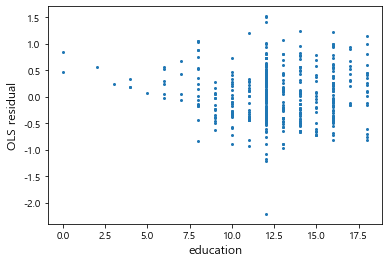

In [6]:
# 가정에 대해서 검토할 수 있는 그림
plt.plot(x, resid, linestyle='none', marker='o', markersize='2')
plt.xlabel('education', fontsize=12)
plt.ylabel('OLS residual', fontsize=12)
# x에 대해서 얼마나 퍼져있는가 - 분산
# SLR5 가정 - 분산은 x와 상관없이 항상 동일하다. 
# 오차항의 분산은 못보기에 잔차항으로 대체
# x값에 따라서 잔차항이 퍼져있는 정도가 달라진다.
# 잔차항의 분산이 x에 의해 영향을 받을 가능성이 높다고 보는 그림.

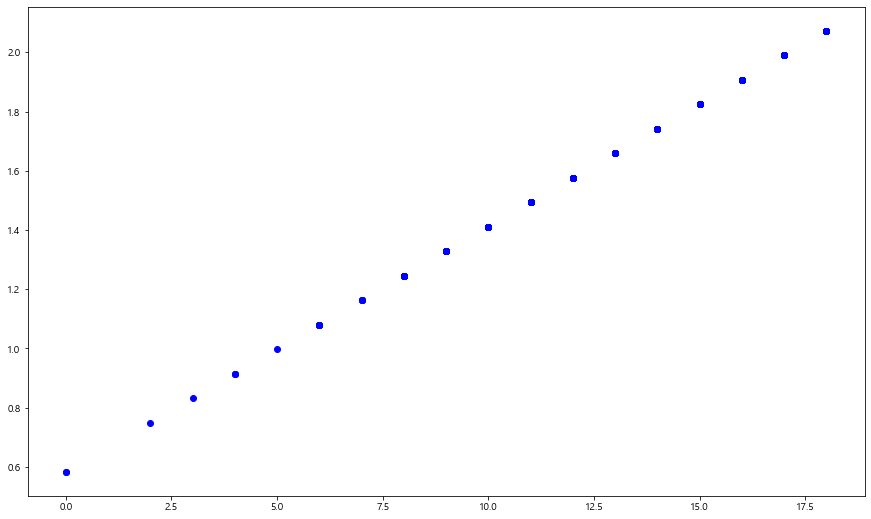

In [7]:
fig =plt.figure(figsize=(15, 9))
scatter1 = fig.add_subplot(111)
#scatter1.scatter(x, y, c='b', marker='o', label='y')
scatter1.scatter(x, y_hat, c='b', marker='o', label='y_hat') # y_hat 예측 회귀선

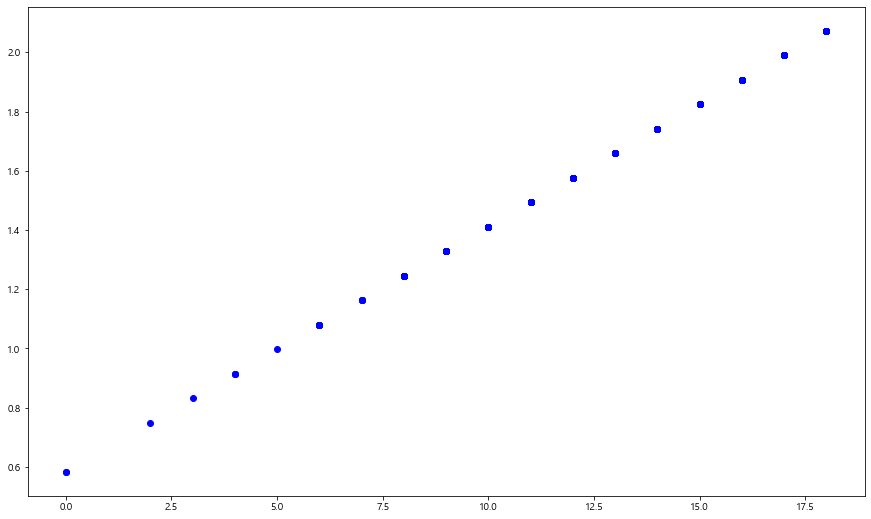

In [7]:
fig =plt.figure(figsize=(15, 9))
scatter1 = fig.add_subplot(111)
#scatter1.scatter(x, y, c='b', marker='o', label='y')
scatter1.scatter(x, y_hat, c='b', marker='o', label='y_hat') # y_hat 예측 회귀선

In [8]:
scatter1.scatter(x, y_hat, c='b', marker='o', label='y_hat')

In [16]:
# 다중회귀
x1 = wage['educ'].values
x2 = wage['exper'].values 
x = np.column_stack((x1, x2))
X_m = sm.add_constant(x)
wage_model_m = sm.OLS(y, X_m)
results_m = wage_model_m.fit()
print(results_m.summary())
y_hat_m = results_m.predict(X_m)
resid_m = y - y_hat_m

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     86.86
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           2.68e-33
Time:                        15:22:38   Log-Likelihood:                -338.01
No. Observations:                 526   AIC:                             682.0
Df Residuals:                     523   BIC:                             694.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2169      0.109      1.997      0.0

Text(0, 0.5, 'OLS residual')

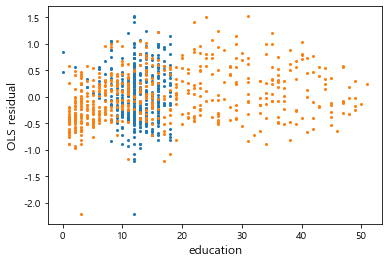

In [22]:
plt.plot(x,resid,linestyle='none',marker='o',markersize='2')
plt.xlabel('education',fontsize=12)
plt.ylabel('OLS residual',fontsize=12)


In [21]:
from statsmodels.formula.api import ols
equation ='lwage~educ+exper+married+nonwhite'
results1 = ols(equation, wage1).fit()
print(results1.summary())
hyp = 'educ = 0.3 * exper'
test = results1.t_test(typ)
print(t_test)


                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     49.63
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           2.18e-35
Time:                        15:48:09   Log-Likelihood:                -328.53
No. Observations:                 526   AIC:                             667.1
Df Residuals:                     521   BIC:                             688.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2163      0.108      2.005      0.0

NameError: name 'typ' is not defined